In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

/Users/Monica/.virtualenvs/dataanalysis/lib/python3.5/site-packages/matplotlib/__init__.py:1035: UserWarning: Duplicate key in file "/Users/Monica/.matplotlib/matplotlibrc", line #2
  (fname, cnt))


# The NBA

In [3]:
# Import the performance data
performance_df = pd.read_excel("NBA stats.xlsx", sheetname="Player performance")
performance_df.head()

,Player,TEAM,AGE,GP,W,L,MIN,FGM,FGA,FG%,...,DREB,REB,AST,TOV,STL,BLK,PF,DD2,TD3,PTS
0,Stephen Curry,Golden State Warriors,28,79,71,8,34.2,10.2,20.2,50.4,...,4.6,5.4,6.7,3.3,2.1,0.2,2.0,15,2,30.1
1,James Harden,Houston Rockets,26,82,41,41,38.1,8.7,19.7,43.9,...,5.3,6.1,7.5,4.6,1.7,0.6,2.8,23,3,29.0
2,Kevin Durant,Oklahoma City Thunder,27,72,52,20,35.8,9.7,19.2,50.5,...,7.6,8.2,5.0,3.5,1.0,1.2,1.9,27,1,28.2
3,DeMarcus Cousins,Sacramento Kings,25,65,29,36,34.6,9.2,20.5,45.1,...,9.1,11.5,3.3,3.8,1.6,1.4,3.6,47,1,26.9
4,LeBron James,Cleveland Cavaliers,31,76,56,20,35.6,9.7,18.6,52.0,...,6.0,7.4,6.8,3.3,1.4,0.6,1.9,28,3,25.3


In [4]:
# Import the salary data
salary_df = pd.read_excel("NBA stats.xlsx", sheetname="2016-2017 Salaries")
salary_df.head()

,RK,NAME,POS,TEAM,SALARY
0,1,Mike Conley,PG,Memphis Grizzlies,26540100
1,2,Al Horford,C,Boston Celtics,26540100
2,3,Carmelo Anthony,SF,New York Knicks,24559380
3,4,Damian Lillard,PG,Portland Trail Blazers,24328425
4,5,Chris Bosh,PF,Miami Heat,23741060


In [6]:
# Merge the two together
df = performance_df.merge(salary_df, left_on='Player', right_on='NAME')
df.head()

,Player,TEAM_x,AGE,GP,W,L,MIN,FGM,FGA,FG%,...,BLK,PF,DD2,TD3,PTS,RK,NAME,POS,TEAM_y,SALARY
0,Stephen Curry,Golden State Warriors,28,79,71,8,34.2,10.2,20.2,50.4,...,0.2,2.0,15,2,30.1,68,Stephen Curry,PG,Golden State Warriors,12112359
1,DeMarcus Cousins,Sacramento Kings,25,65,29,36,34.6,9.2,20.5,45.1,...,1.4,3.6,47,1,26.9,35,DeMarcus Cousins,C,Sacramento Kings,16957900
2,Damian Lillard,Portland Trail Blazers,25,75,40,35,35.7,8.2,19.7,41.9,...,0.4,2.2,15,0,25.1,4,Damian Lillard,PG,Portland Trail Blazers,24328425
3,Anthony Davis,New Orleans Pelicans,23,61,24,37,35.5,9.2,18.6,49.3,...,2.0,2.4,36,0,24.3,11,Anthony Davis,PF,New Orleans Pelicans,22116750
4,Russell Westbrook,Oklahoma City Thunder,27,80,55,25,34.4,8.2,18.1,45.4,...,0.3,2.5,54,18,23.5,24,Russell Westbrook,PG,Oklahoma City Thunder,17769374


In [9]:
#df['SALARY']

In [20]:
high_df = df.sort_values('SALARY', ascending = False).head(1)

In [67]:
low_df = df.sort_values('SALARY', ascending = True).head(1)

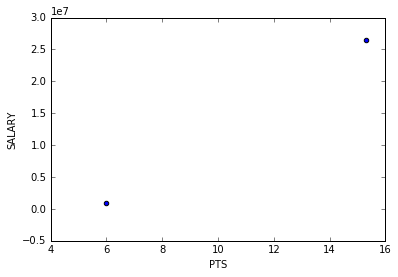

In [51]:
ax = low_df.plot(kind="scatter", x="PTS", y="SALARY")
high_df.plot(kind="scatter", x="PTS", y="SALARY", ax=ax)

In [61]:
import numpy as np
import matplotlib.pyplot as plt

low_salary = low_df['SALARY']
low_points = low_df['PTS']
low_dfs = low_salary * low_points
high_salary = high_df['SALARY']
high_points = high_df['PTS']
high_dfs = high_salary + low_salary
ax = low_df.plot(kind="scatter", x="PTS", y="SALARY", s =low_dfs)
high_df.plot(kind="scatter", x="PTS", y="SALARY", ax=ax)

TypeError: 'int' object is not subscriptable

In [86]:
low_df.reset_index()
high_df.reset_index()

,index,Player,TEAM_x,AGE,GP,W,L,MIN,FGM,FGA,...,BLK,PF,DD2,TD3,PTS,RK,NAME,POS,TEAM_y,SALARY
0,45,Mike Conley,Memphis Grizzlies,28,56,33,23,31.4,5.3,12.4,...,0.3,1.8,4,0,15.3,1,Mike Conley,PG,Memphis Grizzlies,26540100


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

low_salary = low_df['SALARY']
low_points = low_df['PTS']
low_dfs = (low_salary + low_points)/150
high_salary = high_df['SALARY']
high_points = high_df['PTS']
high_dfs = (high_salary + high_points)/150
ax = low_df.plot(kind="scatter", x="PTS", y="SALARY", s =low_dfs, alpha = 0.5)
high_df.plot(kind="scatter", x="PTS", y="SALARY", s=high_dfs, ax=ax, alpha = 0.2)


In [3]:
points_df  = pd.read_csv("scrabble-point-spread.csv")
tournament_df = pd.read_csv("scrabble-tournament.csv")
df = tournament_df.merge(points_df, left_on='Player ID', right_on='player_id').fillna(0)
df.head()


,Byes,Credits,Losses,Name,New Rating,Old Rating,Other Money,Perf Rating,Place,Player ID,...,Seed,Spread,Ties,Tournament ID,Wins,division,player_id,points_against,points_for,tournament_id
0,0.0,0.0,7,Nigel Richards,2196,2168.0,0,2356.0,1,6003,...,1,1934,0.0,8163,24,Division 1,6003,381,443,8163
1,0.0,0.0,7,Komol Panyasophonlert,2070,2002.0,0,2372.0,2,20749,...,11,1868,0.0,8163,24,Division 1,20749,375,435,8163
2,0.0,0.0,8,Will Anderson,2093,2054.0,0,2264.0,3,19535,...,2,1623,0.0,8163,23,Division 1,19535,391,443,8163
3,0.0,0.0,9,Noah Walton,2063,2015.0,0,2239.0,4,18474,...,8,1628,0.0,8163,22,Division 1,18474,386,439,8163
4,0.0,0.0,10,Kenji Matsumoto,2057,2023.0,0,2212.0,5,583,...,5,1671,0.0,8163,21,Division 1,583,396,450,8163


In [8]:
df.columns

Index(['Byes', 'Credits', 'Losses', 'Name', 'New Rating', 'Old Rating',
       'Other Money', 'Perf Rating', 'Place', 'Player ID', 'Prize Money',
       'Seed', 'Spread', 'Ties', 'Tournament ID', 'Wins', 'division',
       'player_id', 'points_against', 'points_for', 'tournament_id'],
      dtype='object')

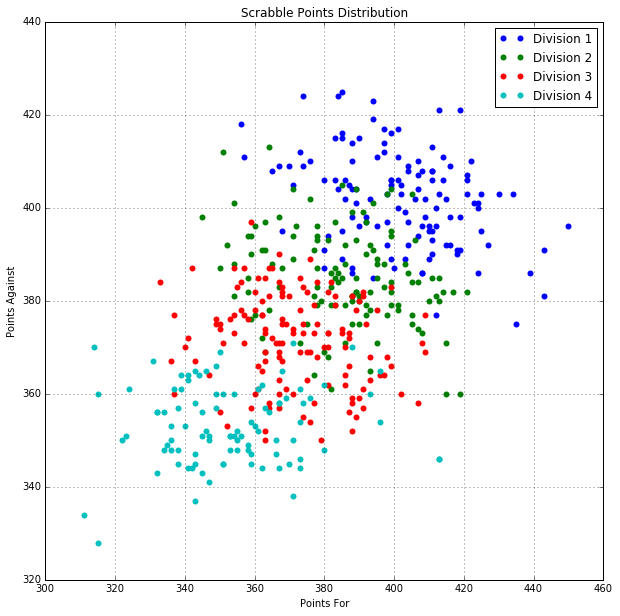

In [17]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("Scrabble Points Distribution")
for category, group in df.groupby('division'):
    ax.plot(group['points_for'], group['points_against'], marker='o', linestyle='', label=category, markeredgewidth=0)
#ax.set_xlim([0, 35])
#ax.set_ylim([0, 30000000])
ax.legend()
plt.grid(True)
ax.set_ylabel("Points Against")
ax.set_xlabel("Points For")
plt.savefig('scrabble.pdf')